<a href="https://colab.research.google.com/github/TifaAmal1na/PCVK_Genap_2023/blob/main/PCVK_TugasBesar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#####Install FastAI dan import Library

In [ ]:
#Library
from fastai import *
from fastai.vision.all import *
from fastai.metrics import error_rate
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from pathlib import Path
from fastai.vision.data import ImageDataLoaders

#####Menghubungkan ke google

In [ ]:
#Connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#####Pendefinisian path file yang akan digunakan

#####Pemberian definisi pada path file

In [ ]:
#Memberikan definisi pada Path
x = '/content/drive/MyDrive/PCVK/img/train'
path = Path(x)
path.ls()

(#5) [Path('/content/drive/MyDrive/PCVK/img/train/bed'),Path('/content/drive/MyDrive/PCVK/img/train/chair'),Path('/content/drive/MyDrive/PCVK/img/train/sofa'),Path('/content/drive/MyDrive/PCVK/img/train/swivelchair'),Path('/content/drive/MyDrive/PCVK/img/train/table')]

#####Membuat objek ImageDataLoaders untuk memuat data dari folder dengan data validasi 20%

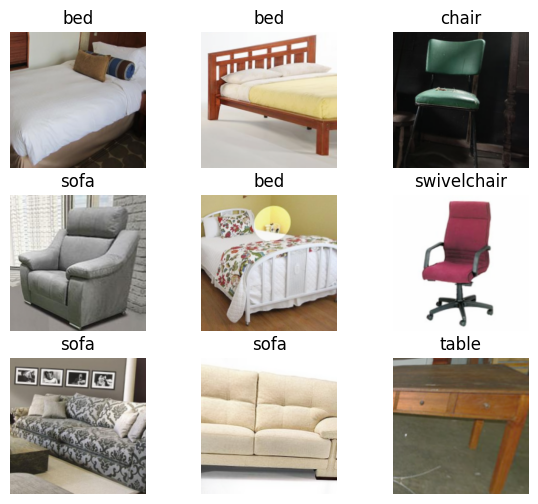

In [ ]:
np.random.seed(40)

dataRaw = ImageDataLoaders.from_folder(path, train='.', valid_pct=0.2, item_tfms=Resize(224),
                                       batch_tfms=[*aug_transforms(), Normalize.from_stats(*imagenet_stats)])
dataRaw.show_batch(figsize=(7, 6))

#####Menampilkan tampilan batch data yang dimuat

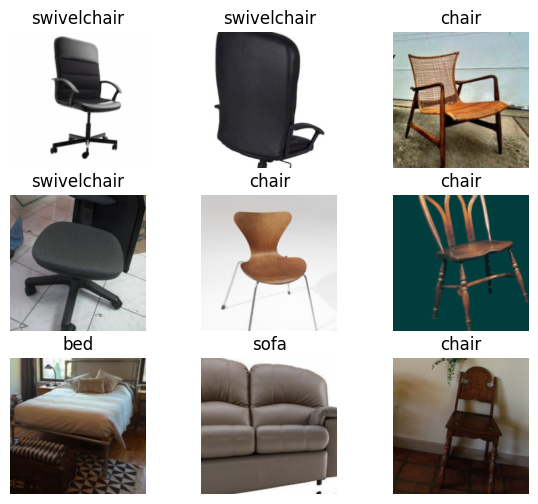

In [ ]:
dataRaw.show_batch(figsize=(7, 6))

#####Membuat model CNN menggunakan cnn_learner

In [ ]:
hasil = '/content/drive/MyDrive/PCVK/img/val'
learnRaw = cnn_learner(dataRaw, models.resnet18, metrics=[accuracy], model_dir = Path(hasil), path = Path("."))

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 144MB/s]


#####Mencari learning rate menggunakan lr_find

SuggestedLRs(valley=0.0020892962347716093)

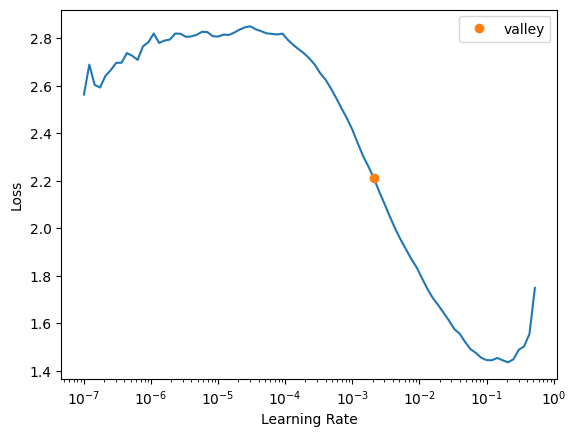

In [ ]:
learnRaw.lr_find()

#####Melakukan pelatihan model dengan fit_one_cycle

In [ ]:
from IPython.display import clear_output, DisplayHandle
def update_patch(self, object):
  clear_output(wait=True)
  self.display(object)
DisplayHandle.update = update_patch

lr1 = 1e-3
lr2 = 1e-1
learnRaw.fit_one_cycle(40,slice(lr1,lr2))

epoch,train_loss,valid_loss,accuracy,time
0,0.500069,0.169963,0.939055,02:00
1,0.312545,0.240388,0.931592,00:27
2,0.293335,0.211957,0.950249,00:27
3,0.347767,0.799260,0.914179,00:25
4,0.446899,0.312549,0.944030,00:27
5,0.578666,0.428447,0.937811,00:25
6,0.755360,0.892004,0.902985,00:28
7,0.833049,0.735928,0.956468,00:30
8,1.084644,0.884176,0.945274,00:25
9,0.921097,0.667344,0.953980,00:27


#####Melakukan proses unfreeze dan pelatihan dengan learning rate

In [ ]:
from IPython.display import clear_output, DisplayHandle
def update_patch(self, objective):
  clear_output(wait=True)
  self.display(objective)
DisplayHandle.update = update_patch

learnRaw.unfreeze()
learnRaw.fit_one_cycle(20,slice(1e-4,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.049854,0.121896,0.980099,00:26
1,0.084189,0.234228,0.968905,00:31
2,0.174986,23.812168,0.952736,00:25
3,0.220421,85.989243,0.814677,00:28
4,0.215795,0.117171,0.982587,00:27
5,0.172753,0.282781,0.950249,00:26
6,0.154556,0.221353,0.962687,00:27
7,0.133949,0.166093,0.975124,00:25
8,0.101113,0.161195,0.966418,00:27
9,0.098270,0.125446,0.977612,00:27


#####Menampilkan pot loss pelatihan

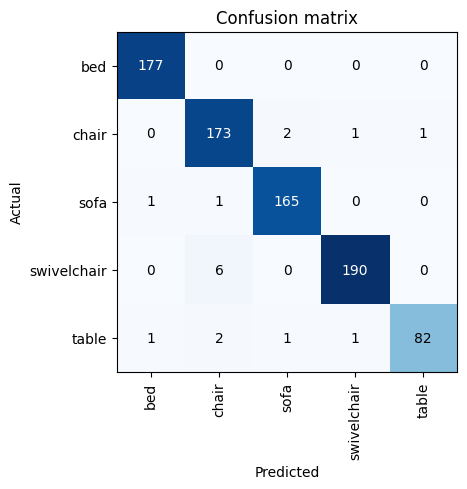

In [ ]:
interpRaw = ClassificationInterpretation.from_learner(learnRaw)
interpRaw.plot_confusion_matrix()

#####Interpretasi klasifikasi model

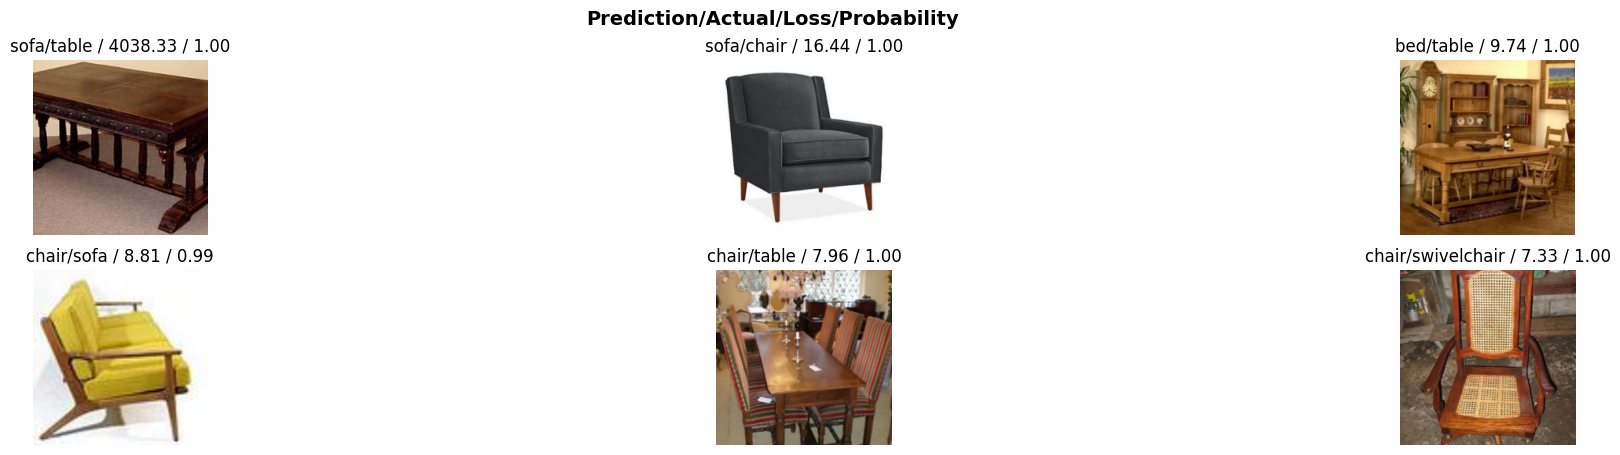

In [ ]:
interpRaw.plot_top_losses(6,figsize = (25,5))

#####Melakukan prediksi menggunakan model

In [ ]:
img = load_image('/content/drive/MyDrive/PCVK/img/val/sofa/00000209.jpg')
print(learnRaw.predict(img)[0])

sofa


In [ ]:
img = load_image('/content/drive/MyDrive/PCVK/img/val/table/00000397.jpg')
print(learnRaw.predict(img)[0])

table


In [ ]:
learnRaw.export(Path("/content/drive/MyDrive/PCVK/Prediksi/export.pkl"))
learnRaw.model_dir = "/content/drive/MyDrive/PCVK/img/final"
learnRaw.save("stage-1")

Path('/content/drive/MyDrive/PCVK/img/final/stage-1.pth')

prediksi CNN

In [ ]:
from fastai.vision.all import *

# Impor model yang telah diekspor
learn = load_learner("/content/drive/MyDrive/PCVK/Prediksi/export.pkl")

# Contoh penggunaan model untuk melakukan prediksi pada data baru
image_path = "/content/drive/MyDrive/PCVK/Prediksi/pic.jpg"
image = PILImage.create(image_path)
prediction, _, probabilities = learn.predict(image)
print("Prediction:", prediction)
print("Probabilities:", probabilities)


Prediction: chair
Probabilities: tensor([1.4261e-18, 1.0000e+00, 4.6483e-23, 3.1695e-11, 4.2382e-18])
